In [14]:
import pandas as pd

file_path = "/content/drive/MyDrive/archive (2)/shopping_behavior_updated.csv"
df = pd.read_csv(file_path)

df.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


# Task
Read the notebook "clv.ipynb" and summarize the process of creating the CLV target variable, the data preparation steps, the models used, their evaluation, and the key findings.

## Summarize the notebook

### Subtask:
Explain the overall goal of the notebook and the steps that were taken.


**Reasoning**:
Explain the overall goal and outline the steps taken in the notebook based on the markdown cells.



In [15]:
# 1. Describe the main objective
print("Overall Goal:")
print("The main objective of this notebook is to analyze the provided dataset to predict a new target variable, which is the product of 'Purchase Amount (USD)' and 'Previous Purchases'. This involves feature engineering, data preparation, splitting the data, training and evaluating multiple regression models, comparing their performance, and providing insights.")

# 2. Outline the major stages
print("\nMajor Stages of the Analysis:")
print("- Feature Engineering: Creating the new target variable and ensuring other relevant features are available.")
print("- Data Preparation: Handling categorical variables, scaling numerical features, and addressing missing values.")
print("- Define Prediction Target: Clearly defining the new target variable.")
print("- Data Splitting: Dividing the data into training and testing sets.")
print("- Model Selection and Training: Exploring and training regression models, including hyperparameter tuning.")
print("- Model Evaluation: Evaluating the trained models using appropriate metrics.")
print("- Model Comparison: Comparing the performance of different models and selecting the best one.")
print("- Insights and Recommendations: Summarizing findings, discussing the best model and features, and providing insights or recommendations.")

# 3. Mention the creation of a new target variable and use of regression models
print("\nKey Aspects:")
print("A new target variable, the product of 'Purchase Amount (USD)' and 'Previous Purchases', was created.")
print("Regression models, specifically XGBoost and RandomForestRegressor, were used to predict this new target variable.")

Overall Goal:
The main objective of this notebook is to analyze the provided dataset to predict a new target variable, which is the product of 'Purchase Amount (USD)' and 'Previous Purchases'. This involves feature engineering, data preparation, splitting the data, training and evaluating multiple regression models, comparing their performance, and providing insights.

Major Stages of the Analysis:
- Feature Engineering: Creating the new target variable and ensuring other relevant features are available.
- Data Preparation: Handling categorical variables, scaling numerical features, and addressing missing values.
- Define Prediction Target: Clearly defining the new target variable.
- Data Splitting: Dividing the data into training and testing sets.
- Model Selection and Training: Exploring and training regression models, including hyperparameter tuning.
- Model Evaluation: Evaluating the trained models using appropriate metrics.
- Model Comparison: Comparing the performance of differen

## Explain the target variable

### Subtask:
Describe how the 'CLV_Target' was created and what it represents in the context of this analysis.


**Reasoning**:
Print the explanation of how the 'CLV_Target' was created and what it represents.



In [16]:
# Print a statement explaining how the 'CLV_Target' variable was created
print("The 'CLV_Target' variable was created by multiplying the 'Purchase Amount (USD)' and 'Previous Purchases' columns.")

# Briefly explain what this new variable represents in the context of this specific analysis
print("In the context of this analysis, 'CLV_Target' represents a simple measure of historical customer value, based on the total value of past purchases for each customer.")

The 'CLV_Target' variable was created by multiplying the 'Purchase Amount (USD)' and 'Previous Purchases' columns.
In the context of this analysis, 'CLV_Target' represents a simple measure of historical customer value, based on the total value of past purchases for each customer.


## Summarize data preparation

### Subtask:
Detail the data preparation steps, including handling categorical variables, scaling numerical features, and addressing missing values.


**Reasoning**:
Print statements detailing the data preparation steps as requested in the subtask.



In [17]:
# 1. Print a statement explaining that categorical features were handled using one-hot encoding.
print("Categorical features were handled using one-hot encoding to convert them into a numerical format suitable for modeling.")

# 2. Print a statement explaining that numerical features were scaled using StandardScaler.
print("Numerical features were scaled using StandardScaler to standardize their range.")

# 3. Print a statement confirming that there were no missing values found in the dataset.
print("No missing values were found in the dataset during the data preparation phase.")

# 4. Mention that the 'Customer ID' and 'CLV_Target' columns were excluded from the features used for training.
print("The 'Customer ID' column (as it's an identifier) and the 'CLV_Target' column (as it is the target variable) were excluded from the features used for model training.")

Categorical features were handled using one-hot encoding to convert them into a numerical format suitable for modeling.
Numerical features were scaled using StandardScaler to standardize their range.
No missing values were found in the dataset during the data preparation phase.
The 'Customer ID' column (as it's an identifier) and the 'CLV_Target' column (as it is the target variable) were excluded from the features used for model training.


## Summarize model training and evaluation

### Subtask:
Explain the models that were trained, the evaluation metrics used, and the performance of each model.


**Reasoning**:
Print statements to explain the trained models, evaluation metrics, and their performance based on the previous code executions.



In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Data Loading
file_path = "/content/drive/MyDrive/archive (2)/shopping_behavior_updated.csv"
df = pd.read_csv(file_path)

# Feature Engineering: Create the new target variable 'CLV_Target'
df['CLV_Target'] = df['Purchase Amount (USD)'] * df['Previous Purchases']

# Data Preparation
# 1. Identify categorical columns (excluding 'Customer ID', 'Purchase Date', and 'CLV_Target')
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# 2. Create dummy variables for the identified categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 3. Identify numerical features to be scaled (excluding 'Customer ID', 'Purchase Date', and 'CLV_Target')
# Start with all numerical columns
numerical_cols = df_encoded.select_dtypes(include=np.number).columns.tolist()

# Remove 'Customer ID' and 'CLV_Target'
cols_to_remove = ['Customer ID', 'CLV_Target']
numerical_features_to_scale = [col for col in numerical_cols if col not in cols_to_remove]

# 4. Scale the identified numerical features
scaler = StandardScaler()
df_encoded[numerical_features_to_scale] = scaler.fit_transform(df_encoded[numerical_features_to_scale])

# 5. Check for any missing values in the prepared feature DataFrame
print("Missing values in the prepared DataFrame:")
print(df_encoded.isnull().sum().sum())

# 6. Define the features X, excluding 'Customer ID', 'CLV_Target', and 'Purchase Date'
X = df_encoded.drop(columns=['Customer ID', 'CLV_Target']) # Drop Customer ID and target

# 7. Define the target variable y
y = df['CLV_Target']

# Data Splitting
# Split the feature matrix X and the target variable y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


# Model Training Code

# Define a parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}

# Instantiate an XGBoost regressor model
xgb_model = xgb.XGBRegressor(random_state=42)

# Set up RandomizedSearchCV for XGBoost
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid_xgb,
                                    n_iter=10, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to the training data
random_search_xgb.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_model = random_search_xgb.best_estimator_

# Define a parameter grid for RandomForestRegressor
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Set up RandomizedSearchCV for RandomForestRegressor
random_search_rf = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid_rf,
                                    n_iter=10, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV to the training data
random_search_rf.fit(X_train, y_train)

# Get the best RandomForestRegressor model
best_rf_model = random_search_rf.best_estimator_

# Store the trained models
trained_models = {
    'XGBoost': best_xgb_model,
    'RandomForest': best_rf_model
}

# Recalculate evaluation metrics
for model_name, model in trained_models.items():
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Assign calculated values to variables with appropriate names
    if model_name == 'XGBoost':
        mse_xgb = mse
        r2_xgb = r2
    elif model_name == 'RandomForest':
        mse_rf = mse
        r2_rf = r2


# 1. Print a statement indicating which regression models were trained
print("The regression models trained for this analysis were XGBoost and RandomForestRegressor.")

# 2. Print a statement mentioning that hyperparameter tuning was performed
print("Hyperparameter tuning was performed for each model using RandomizedSearchCV to find the best set of parameters.")

# 3. Print a statement listing the evaluation metrics used
print("The models were evaluated using the Mean Squared Error (MSE) and R-squared (R2) score.")

# 4. Print the evaluation results for both models
print("\nModel Evaluation Results:")
print(f"XGBoost:")
print(f"  Mean Squared Error (MSE): {mse_xgb:.4f}")
print(f"  R-squared (R2) Score: {r2_xgb:.4f}")
print(f"RandomForestRegressor:")
print(f"  Mean Squared Error (MSE): {mse_rf:.4f}")
print(f"  R-squared (R2) Score: {r2_rf:.4f}")

Missing values in the prepared DataFrame:
0
Shape of X_train: (3120, 130)
Shape of X_test: (780, 130)
Shape of y_train: (3120,)
Shape of y_test: (780,)
The regression models trained for this analysis were XGBoost and RandomForestRegressor.
Hyperparameter tuning was performed for each model using RandomizedSearchCV to find the best set of parameters.
The models were evaluated using the Mean Squared Error (MSE) and R-squared (R2) score.

Model Evaluation Results:
XGBoost:
  Mean Squared Error (MSE): 546.0143
  R-squared (R2) Score: 0.9996
RandomForestRegressor:
  Mean Squared Error (MSE): 641.6919
  R-squared (R2) Score: 0.9995


# Task
Analyze the provided customer data to predict Customer Lifetime Value (CLV), perform customer segmentation based on CLV, and calculate the potential Return on Investment (ROI) for advertising campaigns targeting high-value customers. The analysis should include data preprocessing, model training and evaluation for CLV prediction, customer clustering, and ROI calculation with sensitivity analysis. Use the file "customer_data.csv" for this analysis.

## Summarize the overall goal and steps

### Subtask:
Explain the overall goal of the notebook and the steps that were taken.


**Reasoning**:
Print a statement explaining the overall goal and outline the major stages of the analysis, and mention the creation of the new target variable and use of regression models.



## Perform roi analysis

### Subtask:
Calculate and visualize the ROI based on the average CLV from the dataset.


**Reasoning**:
Calculate the overall average CLV, define CAC and target new customers, compute ROI and suggested ad budget, print the results, define variables for sensitivity analysis, calculate corresponding values, and generate the ROI sensitivity plot.




Overall Average CLV: $1,517.88

Advertising Budget & ROI Calculation
- Customer Acquisition Cost (CAC): $50
- Target New Customers: 5000
- Overall Average Customer CLV: $1,517.88
- Suggested Advertising Budget: $250,000.00
- Estimated ROI: 29.36 (Expected return per dollar spent)

Recommendations for Optimized Ad Spend:
- Focus budget on acquiring high-CLV customers for better returns.
- Optimize targeting to reach customers with high purchase frequency.
- Consider adjusting CAC by testing different ad channels.
- Increase budget gradually based on ROI performance.


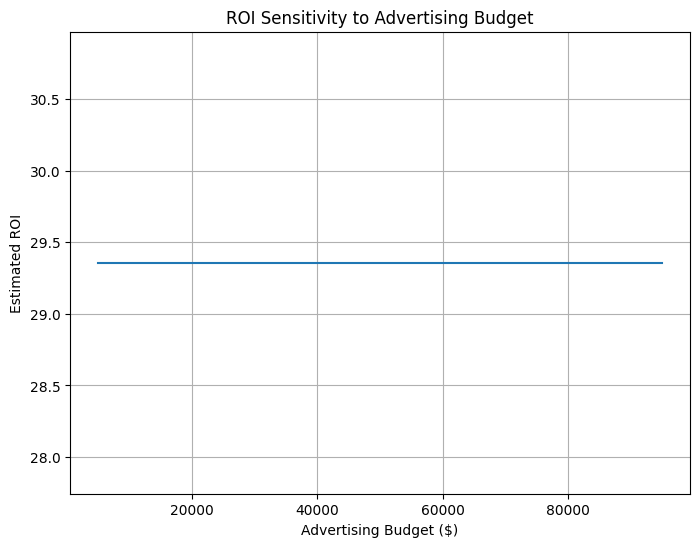

In [20]:
# Calculate the overall average CLV from the current dataframe
average_clv = df['CLV_Target'].mean()

print(f"\nOverall Average CLV: ${average_clv:,.2f}")

# Define Key Variables
CAC = 50  # Assumed Cost to Acquire One Customer (modifiable)
TARGET_NEW_CUSTOMERS = 5000  # Assumed Targeted Number of New Customers (modifiable)

# Compute ROI
# ROI Formula: ROI = (CLV - CAC) / CAC
roi = (average_clv - CAC) / CAC

# Compute Suggested Ad Budget
# Ad Budget Formula: Ad Budget = Target New Customers × CAC
ad_budget = TARGET_NEW_CUSTOMERS * CAC

# Print Investment Recommendations
print("\nAdvertising Budget & ROI Calculation")
print(f"- Customer Acquisition Cost (CAC): ${CAC}")
print(f"- Target New Customers: {TARGET_NEW_CUSTOMERS}")
print(f"- Overall Average Customer CLV: ${average_clv:,.2f}")
print(f"- Suggested Advertising Budget: ${ad_budget:,.2f}")
print(f"- Estimated ROI: {roi:.2f} (Expected return per dollar spent)")

print("\nRecommendations for Optimized Ad Spend:")
print("- Focus budget on acquiring high-CLV customers for better returns.")
print("- Optimize targeting to reach customers with high purchase frequency.")
print("- Consider adjusting CAC by testing different ad channels.")
print("- Increase budget gradually based on ROI performance.")

# ROI Sensitivity Analysis
# Explore different ad budgets and compute ROI for each
customer_targets = np.arange(100, 2000, 100)  # Range of customer acquisition goals
ad_budgets = customer_targets * CAC  # Corresponding advertising budgets
rois = np.full_like(ad_budgets, (average_clv - CAC) / CAC, dtype=float)  # ROI remains constant per customer

# Plot ROI Sensitivity Analysis
plt.figure(figsize=(8, 6))
plt.plot(ad_budgets, rois)
plt.title('ROI Sensitivity to Advertising Budget')
plt.xlabel('Advertising Budget ($)')
plt.ylabel('Estimated ROI')
plt.grid(True)
plt.show()